In [2]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig, Preprocessing

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))
preprocessing = Preprocessing()

bbox = BboxSelector([
    7.554130554199218, # min_x
    51.95590322041212, # min_y
    7.590351104736328, # max_x
    51.97874790276371  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting tracks inside the bbox

# use just one track
single_track_id = track_df['track.id'].unique()[1]
single_track = track_df[track_df['track.id'] == single_track_id]


Hello from preprocessing!


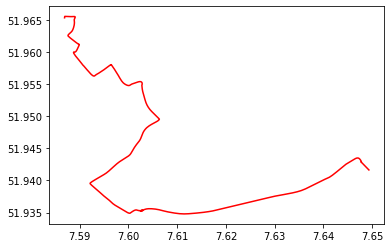

In [12]:
import matplotlib.pyplot as plt

no_outliers = preprocessing.remove_outliers(single_track, 'CO2.value')

# interpolating for each second
interpolated_points = preprocessing.interpolate(no_outliers)

# Simple visualization of the trajectory
fig, ax = plt.subplots()
ax.plot(interpolated_points['lng'], interpolated_points['lat'], 'r-')
plt.show()


In [13]:
import plotly.express as px

# Visualizing points by the CO2 Value
fig = px.scatter_mapbox(interpolated_points, lat="lat", lon="lng", color="CO2.value", title="CO2 values along the track, cleaned and interpolated", zoom=11)
fig.update_layout(mapbox_style="open-street-map")
fig.show()